In [31]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.manifold import TSNE
from datetime import datetime

from nltk.corpus import brown
from machine_learning_examples.rnn_class.brown import get_sentences_with_word2idx_limit_vocab
from machine_learning_examples.nlp_class2.util import find_analogies
from sklearn.feature_extraction.text import TfidfTransformer

In [32]:
sentences, word2idx = get_sentences_with_word2idx_limit_vocab()
with open('w2w_word2idx.json', 'w') as f:
    json.dump(word2idx, f)

# Build term document matrix
V = len(word2idx)
N = len(sentences)

# create raw counts first
A = np.zeros((V,N))
j = 0
for sentence in sentences:
    for i in sentence:
        A[i,j] += 1
    j += 1
print("Finished getting raw counts")

START inf
END inf
man inf
paris inf
britain inf
england inf
king inf
woman inf
rome inf
london inf
queen inf
italy inf
france inf
the 69971
, 58334
. 49346
of 36412
and 28853
to 26158
a 23195
in 21337
that 10594
is 10109
was 9815
he 9548
for 9489
`` 8837
'' 8789
it 8760
with 7289
as 7253
his 6996
on 6741
be 6377
; 5566
at 5372
by 5306
i 5164
this 5145
had 5133
? 4693
not 4610
are 4394
but 4381
from 4370
or 4206
have 3942
an 3740
they 3620
which 3561
-- 3432
one 3292
you 3286
were 3284
her 3036
all 3001
she 2860
there 2728
would 2714
their 2669
we 2652
him 2619
been 2472
) 2466
has 2437
( 2435
when 2331
who 2252
will 2245
more 2215
if 2198
no 2139
out 2097
so 1985
said 1961
what 1908
up 1890
its 1858
about 1815
: 1795
into 1791
than 1790
them 1788
can 1772
only 1748
other 1702
new 1635
some 1618
could 1601
time 1598
! 1596
these 1573
two 1412
may 1402
then 1380
do 1363
first 1361
any 1344
my 1318
now 1314
such 1303
like 1292
our 1252
over 1236
me 1181
even 1170
most 1159
made 1125
also 

unless 101
officer 101
dropped 101
playing 101
trees 101
standing 101
doctor 100
places 100
facilities 100
walk 100
energy 100
thomas 100
talking 100
meant 100
clay 100
sides 100
gas 99
filled 99
techniques 99
june 99
knows 99
hadn't 99
glass 99
jazz 99
poet 99
actual 99
fight 98
concern 98
caught 98
share 98
popular 98
mass 98
claim 98
entered 98
chicago 98
happy 98
bridge 98
institutions 98
style 98
he'd 98
follow 97
dollars 97
communist 97
status 97
included 97
thousand 97
christ 97
isn't 97
heat 97
radiation 97
materials 97
cattle 97
suppose 97
primary 96
accepted 96
books 96
charles 96
12 96
sitting 96
conference 96
opinion 96
usual 96
churches 96
film 96
giving 96
behavior 96
considerable 96
funds 95
construction 95
attempt 95
changed 95
proper 95
successful 95
marriage 95
sea 95
oil 95
sir 95
hell 95
wait 94
sign 94
worth 94
source 94
highly 94
park 94
7 94
discussion 94
everyone 94
practice 94
arm 94
tradition 94
shows 94
someone 94
authority 93
older 93
annual 93
project 93
c.

Finished getting raw counts


In [33]:
# Transform the data into TF-IDF format
transformer = TfidfTransformer()
A = transformer.fit_transform(A)

In [34]:
# The tfidf-transformer returns sparse matrices
# T-SNE can't work on those
# We need the numpy array
A = A.toarray()

In [35]:
# For plotting purposes, we need index to word
# invert the dictionary
idx2word = {v:k for k, v in word2idx.items()}

<ipython-input-36-33a00f911fae>:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=idx2word[i].encode("utf8"), xy=(Z[i,0], Z[i,1]))


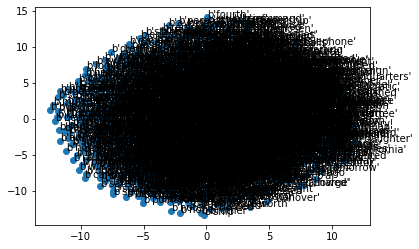

In [36]:
tsne = TSNE()

Z = tsne.fit_transform(A)
plt.scatter(Z[:,0], Z[:,1])
for i in range(V):
    try:
        plt.annotate(s=idx2word[i].encode("utf8"), xy=(Z[i,0], Z[i,1]))
    except:
        print("bad string: ", idx2word[i])
plt.show()

In [38]:
We = Z

find_analogies('king', 'man', 'woman', We, word2idx, idx2word)
find_analogies('france', 'paris', 'london', We, word2idx, idx2word)
find_analogies('france', 'paris', 'rome', We, word2idx, idx2word)
find_analogies('paris', 'france', 'italy', We, word2idx, idx2word)

closest match by euclidean distance: rome
king - man = rome - woman
closest match by cosine distance: life
king - man = life - woman
closest match by euclidean distance: youth
france - paris = youth - london
closest match by cosine distance: religion
france - paris = religion - london
closest match by euclidean distance: parents
france - paris = parents - rome
closest match by cosine distance: broad
france - paris = broad - rome
closest match by euclidean distance: poet
paris - france = poet - italy
closest match by cosine distance: hand
paris - france = hand - italy
